In [100]:
import pandas as pd
data = pd.read_csv("phones_data_missing.csv")
data

Make    Colour  Memory(kb)  Sim Cards     Price
0     0     Nokia    150043.0          4  $400.00 
1     1   Ssamung     87899.0          4  $500.00 
2     2     Nokia         NaN          3       NaN
3     3    Iphone     11179.0          5  $220.00 
4     4  Motorlla    213095.0          4  $350.00 
5     5     Nokia         NaN          4       NaN
6     6   Ssamung     45698.0          4  $750.00 
7     7   Ssamung         NaN          4  $700.00 
8     8       NaN     60000.0          4  $625.00 
9     9  Motorlla     31600.0          4  $970.00

In [105]:
data.dtypes

Make            int64
Colour         object
Memory(kb)    float64
Sim Cards       int64
Price          object
dtype: object

In [106]:
data.isna().sum()

Make          0
Colour        1
Memory(kb)    3
Sim Cards     0
Price         2
dtype: int64

In [107]:
#fill the missing values
#convert data type in to missing type
#Build the  model on data 

In [108]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(7)

# 2: Building Entire Model using Pipeline Part 2 

In [109]:
import pandas as pd
data = pd.read_csv("phones_data_missing.csv")
data

Make    Colour  Memory(kb)  Sim Cards     Price
0     0     Nokia    150043.0          4  $400.00 
1     1   Ssamung     87899.0          4  $500.00 
2     2     Nokia         NaN          3       NaN
3     3    Iphone     11179.0          5  $220.00 
4     4  Motorlla    213095.0          4  $350.00 
5     5     Nokia         NaN          4       NaN
6     6   Ssamung     45698.0          4  $750.00 
7     7   Ssamung         NaN          4  $700.00 
8     8       NaN     60000.0          4  $625.00 
9     9  Motorlla     31600.0          4  $970.00

In [110]:
data.dtypes


Make            int64
Colour         object
Memory(kb)    float64
Sim Cards       int64
Price          object
dtype: object

In [111]:
data.isna().sum()

Make          0
Colour        1
Memory(kb)    3
Sim Cards     0
Price         2
dtype: int64

In [122]:
import pandas as pd
import numpy as pp
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

np.random.seed(7)

In [123]:

data.dropna(subset=["Price"],inplace=True)
data["Price"] = data["Price"].str[:-2]
data["Price"] = data["Price"].str.replace("[\$\,\.]","").astype(int)
data.dtypes

AttributeError: Can only use .str accessor with string values!

In [124]:
data.isna().sum()

Make          0
Colour        1
Memory(kb)    1
Sim Cards     0
Price         0
dtype: int64

In [125]:
##############################1111111111###########
cat_features = ["Make","Colour"]
cat_transformer = Pipeline(steps=[
                    ("imputer",SimpleImputer(strategy="constant",fill_value ="missing" ) ),
                    ("onehot",OneHotEncoder(handle_unknown="ignore"))     
                     ])
#############################222222222################
Sim_features = ["Sim Cards"]
Sim_transformer = Pipeline(steps=[
                    ("imputer",SimpleImputer(strategy="constant",fill_value =4 ) )
                           ])
############################3333333333###############
num_feature = ["Memory(kb)"]
num_transformer= Pipeline(steps=[
                    ("imputer",SimpleImputer(strategy="mean",fill_value =4 ) )
                           ])

# 3: Building Entire Model using Pipeline Part 3 

In [126]:
from sklearn.model_selection import train_test_split

preprocessing = ColumnTransformer(
     transformers =[
          ("cat",cat_transformer,cat_features),
          ("sim",Sim_transformer,Sim_features),
          ("num",num_transformer,num_feature)
     ]
)
model = Pipeline(steps=[
        ("preprocessing",preprocessing),
        ("model",RandomForestRegressor())
])


X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.20)

# run fit and evaluate
model.fit(X_train,y_train)
model.score(X_test,y_test)




-1.661369184027778

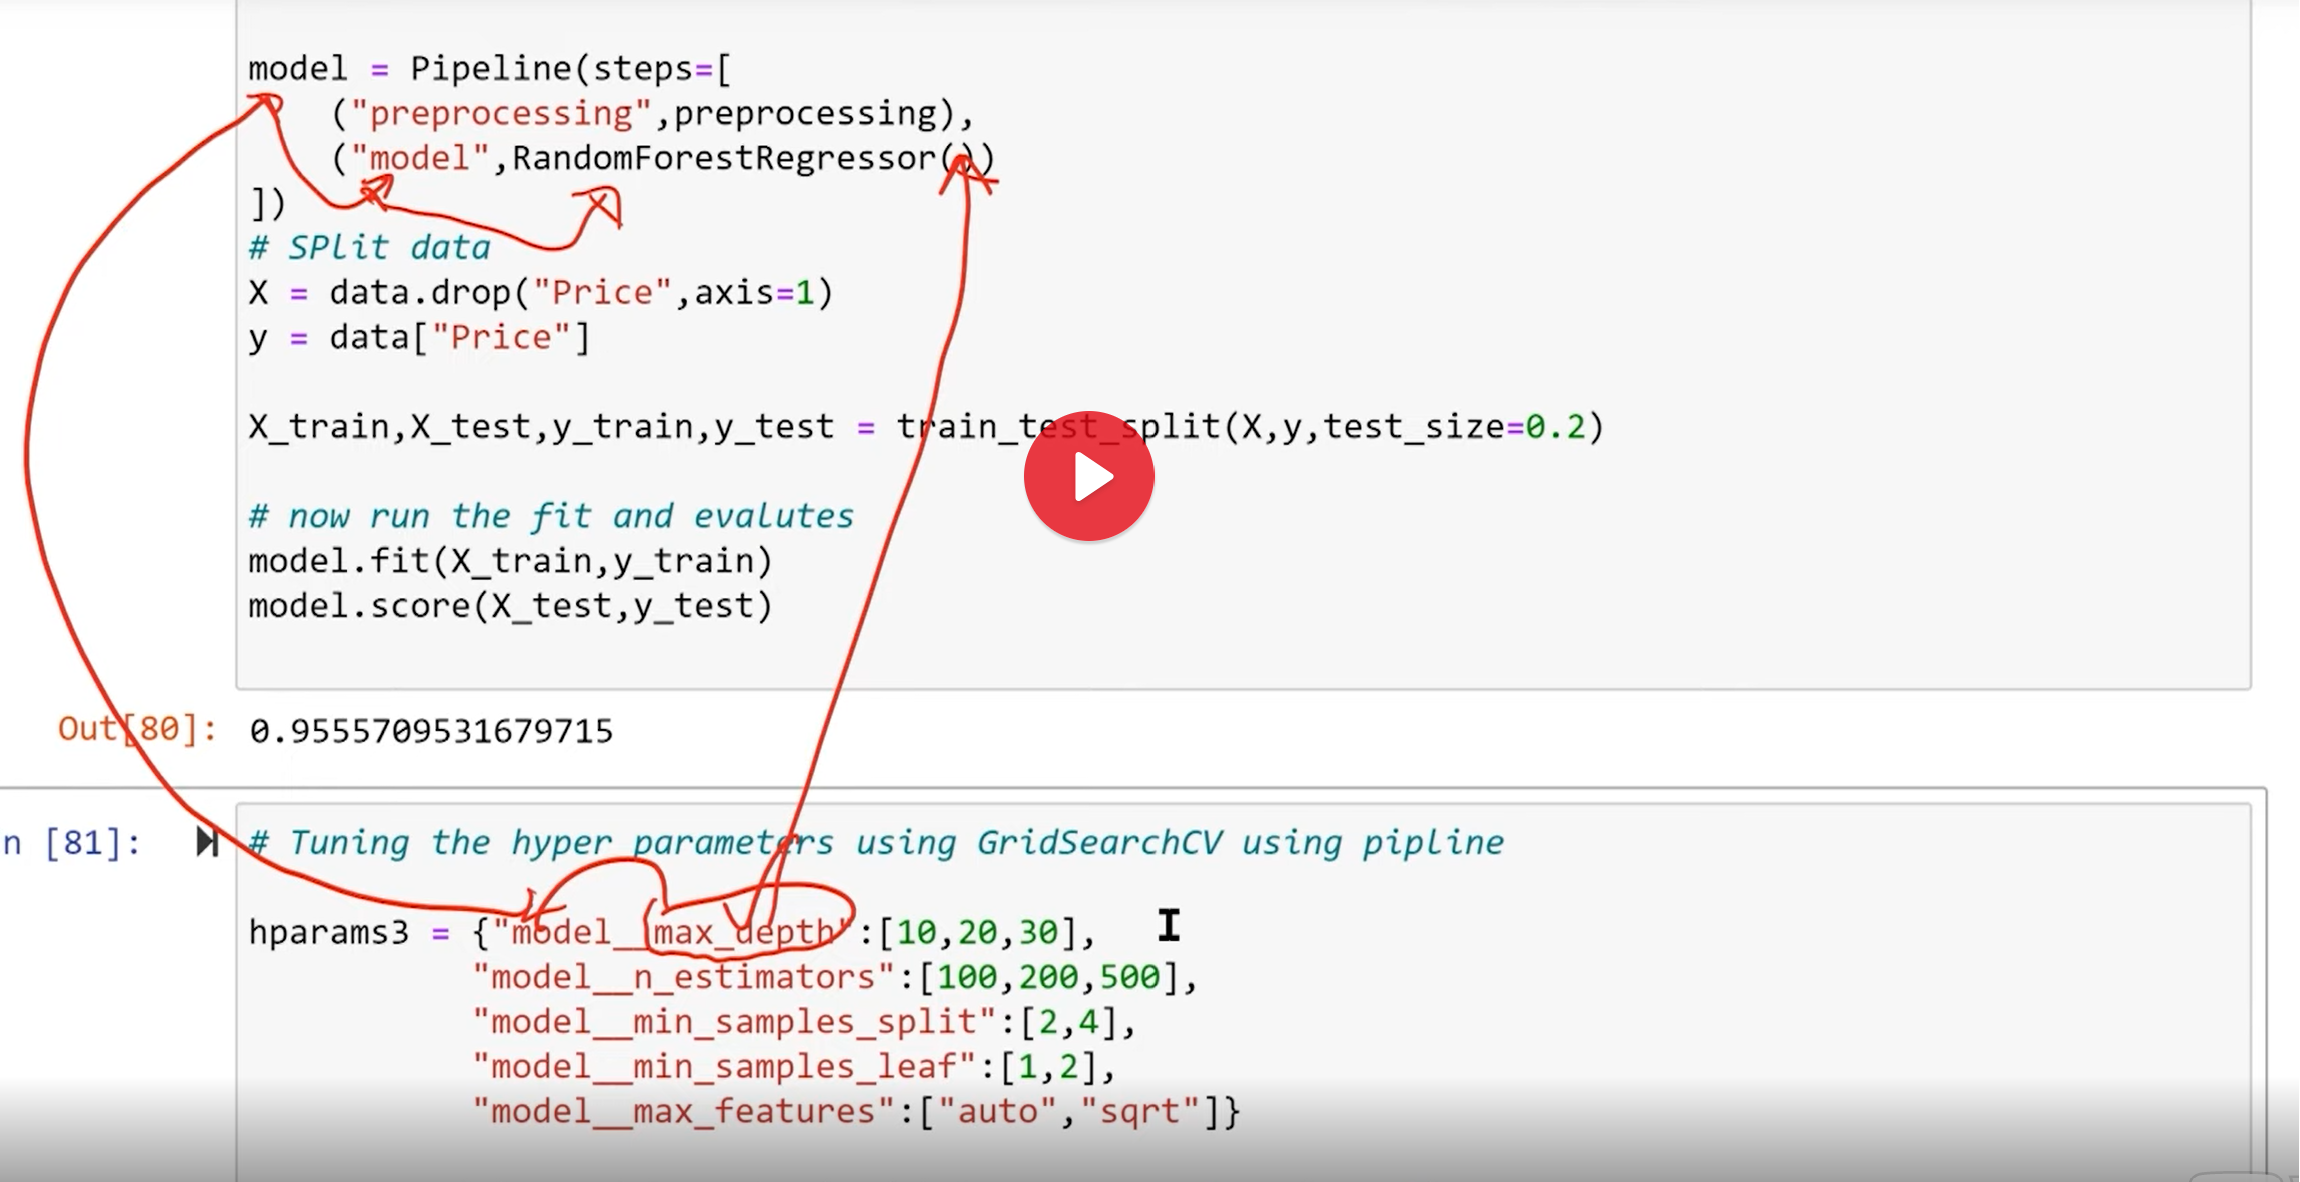

In [128]:
hparam3 = { 
    "preprocessing__num__imputer__strategy" :["mean","medain"],
    "model__max_depth" :[None,5,10,20,30],
    "model__n_estimators": [10,100,200,500,1000,1200], 
    "model__min_samples_split": [2,4,6],
    "model__min_samples_leaf": [1,2,4],
    "model__max_features": ["auto","sqrt"]}

my_gscv_model = GridSearchCV(model,hparam3,cv=5,verbose=2)
my_gscv_model.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.5s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=  

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=  

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total ti

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total 

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   7.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   7.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] EN

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] EN

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END mo

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] EN

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] EN

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END mode

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   8.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.8s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.7s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.7s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.6s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.4s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.7s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.7s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.8s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   7.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.8s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.8s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.6s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   8.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.6s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.6s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.8s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.5s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.3s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   6.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   3.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.7s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   6.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   7.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 sco

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramet

[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV]

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[C

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.9s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] E

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.8s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.6s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   1.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.3s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   3.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   4.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.3s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=10, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.4s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   1.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   4.6s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.5s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=4, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=100, preprocessing__num__imputer__strategy=medain; total time=   0.0s

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.1s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=200, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   1.3s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.0s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=mean; total time=   2.1s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=500, preprocessing__num__imputer__strategy=medain; total time=   0.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.7s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1000, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.9s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   2.6s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   5.2s


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=mean; total time=   3.2s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=   0.0s
[CV] END model__max_depth=30, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=6, model__n_estimators=1200, preprocessing__num__imputer__strategy=medain; total time=

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2700 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('sim',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Sim '
                                                                          'Car...
                                                                                          SimpleImputer(fill_value=4))]),
                                                                         ['Memory(kb)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [10, 100, 200, 500, 1000, 1200],
                         'preprocessing__num__imputer__strategy': ['mean',
                                                                   'medain']},
             verbose=2)

In [129]:
my_gscv_model.score(X_test,y_test)

-1.9562608506944446

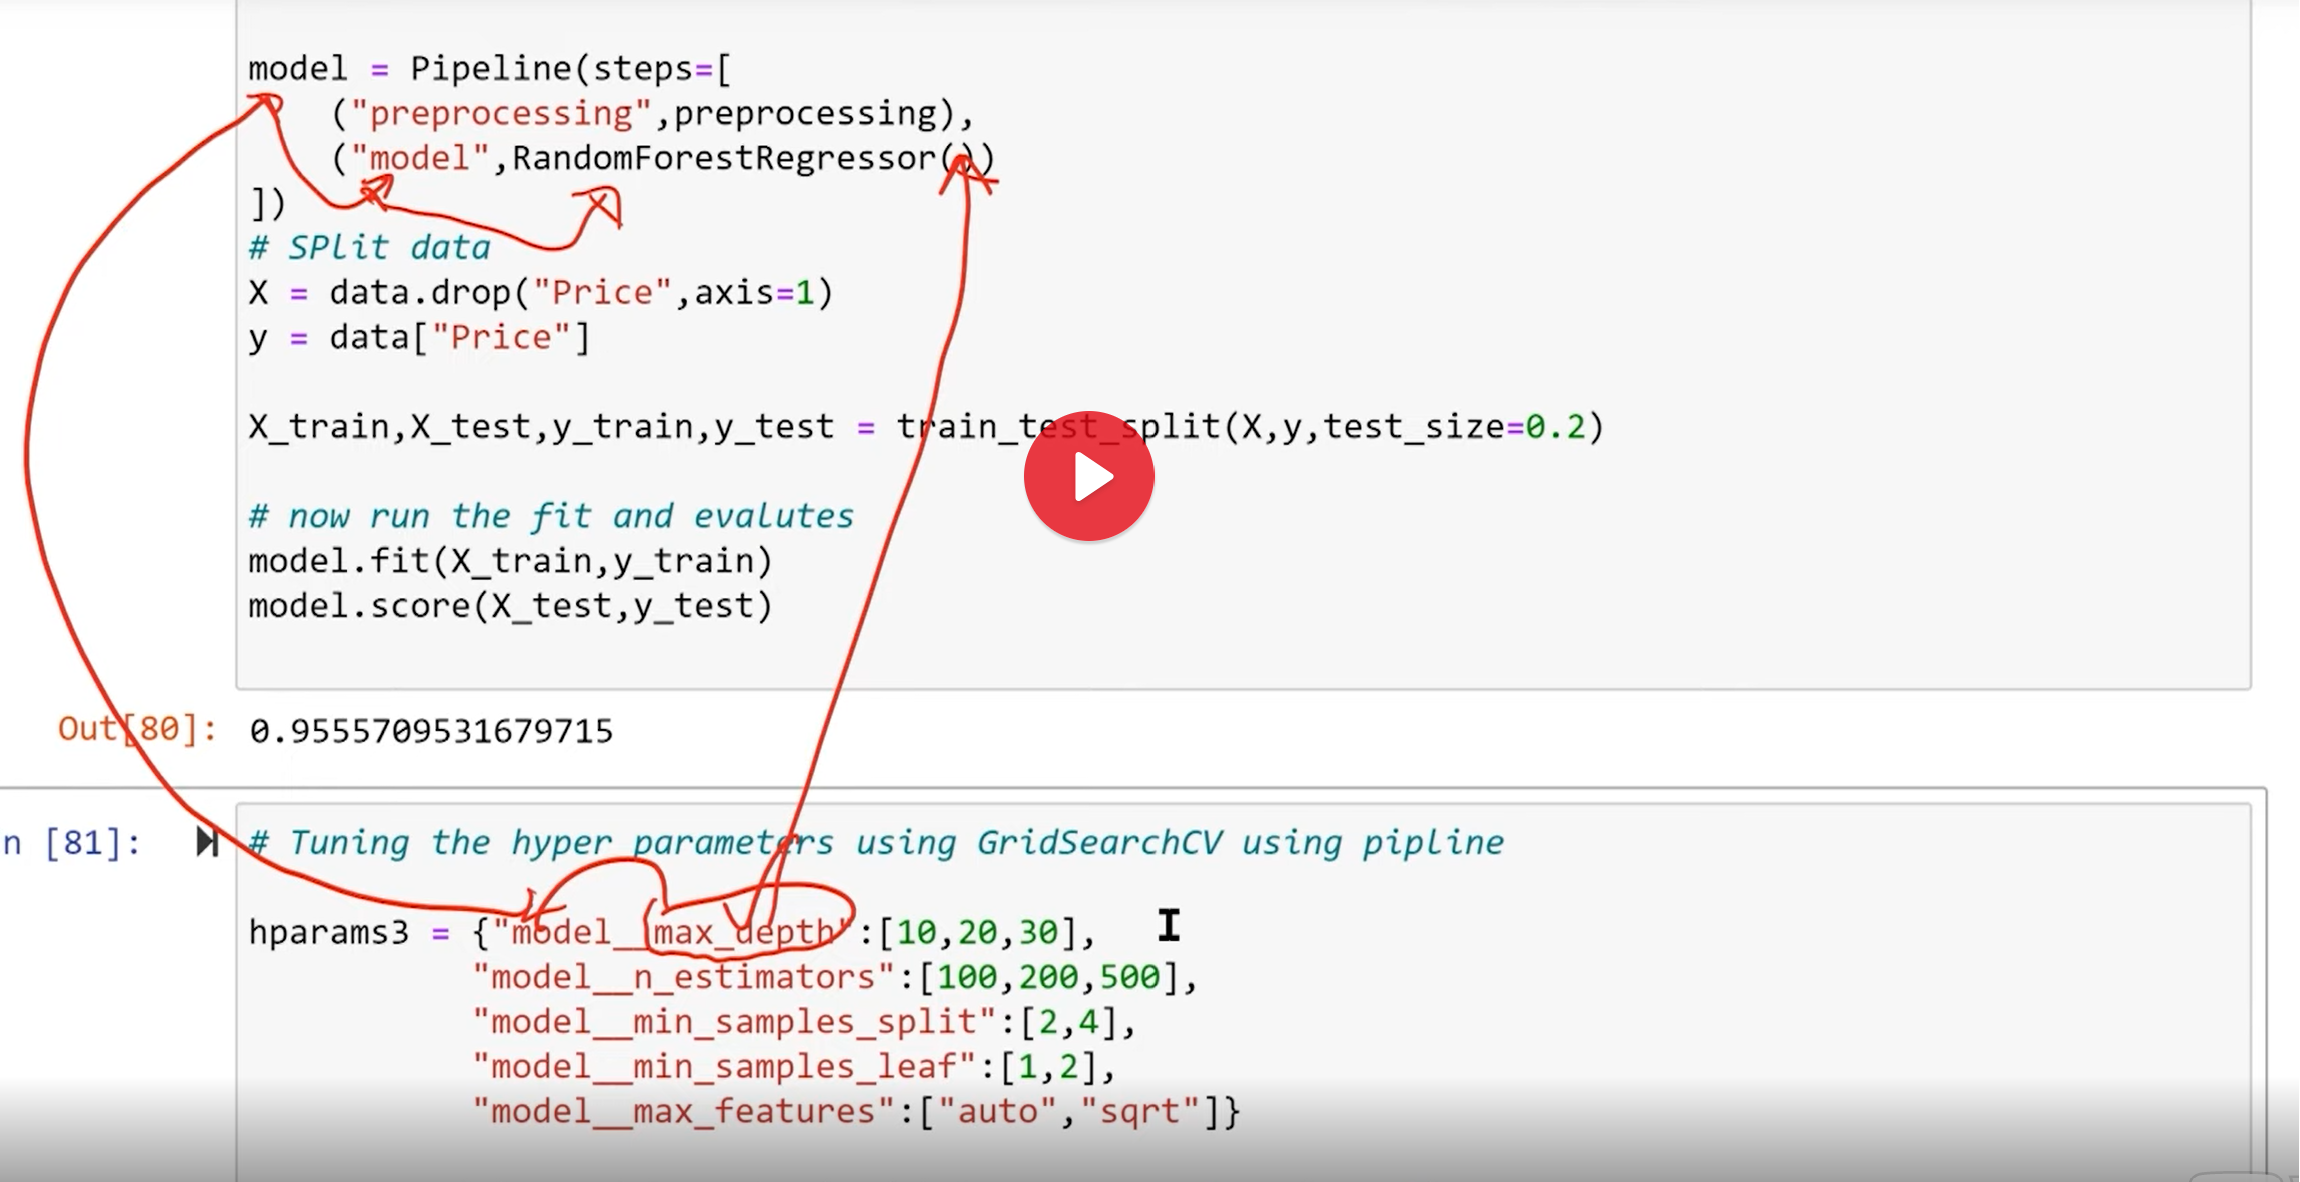